In [1]:
%load_ext autoreload
%autoreload 2  
%autosave 10

Autosaving every 10 seconds


In [2]:
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

### NIH AUC Plots

/jet/home/nmurali/asc170022p/nmurali/anaconda3/envs/pl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/jet/home/nmurali/asc170022p/nmurali/anaconda3/envs/pl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/jet/home/nmurali/asc170022p/nmurali/anaconda3/envs/pl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arg

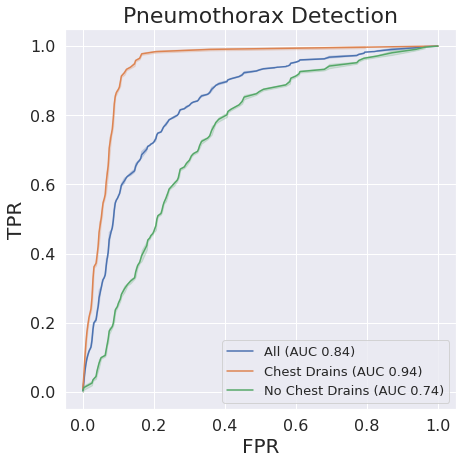

In [13]:
from sklearn import metrics

sns.set(style="darkgrid")
df_tube = pd.read_csv('/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/nih/512/outcomes_test_chestdrain.csv')
df_notube = pd.read_csv('/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/nih/512/outcomes_test_no_chestdrain.csv')
df_all = pd.read_csv('/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/nih/512/outcomes_test_all.csv')
class_name = 'Pneumothorax' # column name as per the outcomes.csv file

class_prob = class_name + '_prob'
fpr_tube, tpr_tube, thresholds1 = metrics.roc_curve(df_tube[class_name], df_tube[class_prob])
fpr_notube, tpr_notube, thresholds2 = metrics.roc_curve(df_notube[class_name], df_notube[class_prob])
fpr, tpr, thresholds = metrics.roc_curve(df_all[class_name], df_all[class_prob])
auc_tube = metrics.auc(fpr_tube,tpr_tube)
auc_notube = metrics.auc(fpr_notube,tpr_notube)
auc = metrics.auc(fpr,tpr)

plt.figure(figsize=(7,7))
sns.lineplot(fpr,tpr,label='All (AUC %.2f)'%(auc))
sns.lineplot(fpr_tube,tpr_tube,label='Chest Drains (AUC %.2f)'%(auc_tube))
fig = sns.lineplot(fpr_notube,tpr_notube,label='No Chest Drains (AUC %.2f)'%(auc_notube))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
fig.figure.savefig("./results/nih_auc.svg")

plt.title('%s Detection' %(class_name),fontsize=22)
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.legend(fontsize=13)

### Chex-MIMIC

In [22]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/chex_mimic/chex_mimic_90perc_test_pd2.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

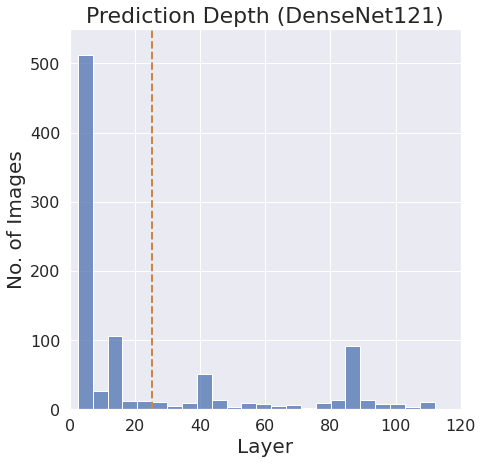

In [23]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (DenseNet121)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,120))
plt.ylim((0,550))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

mask = (batch_info['pd']>=0) & (batch_info['pd']<=120)
pd_mean = np.mean(batch_info['pd'][mask])

sns_hist = sns.histplot(batch_info['pd'],bins=30)
sns_hist.vlines(pd_mean,0,550,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/chex_mimic.svg")

### Ep-1 Chex-MIMIC

In [137]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/chex_mimic/temp_ep1_pd.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

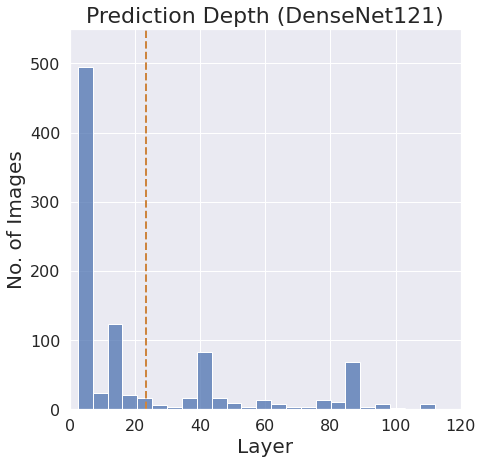

In [139]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (DenseNet121)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,120))
plt.ylim((0,550))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

mask = (batch_info['pd']>=0) & (batch_info['pd']<=120)
pd_mean = np.mean(batch_info['pd'][mask])

sns_hist = sns.histplot(batch_info['pd'],bins=30)
sns_hist.vlines(pd_mean,0,550,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/chex_mimic_ep1.svg")

### GithubCovid

In [110]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/github_covid/github_covid_test_pd.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

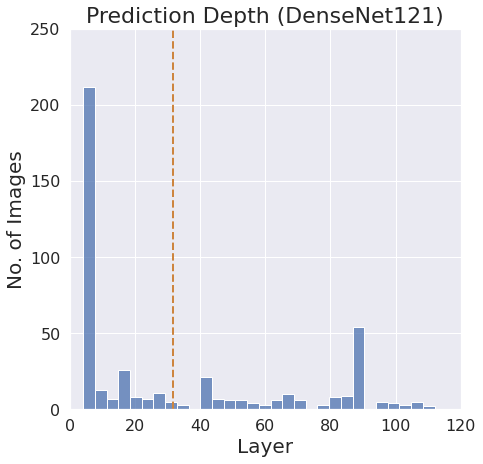

In [111]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (DenseNet121)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,120))
plt.ylim((0,250))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

mask = (batch_info['pd']>=0) & (batch_info['pd']<=120)
pd_mean = np.mean(batch_info['pd'][mask])

sns_hist = sns.histplot(batch_info['pd'][mask],bins=30)
sns_hist.vlines(pd_mean,0,250,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/github_covid.svg")

### GithuCovid Ep-1

In [112]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/github_covid/temp_ep1_pd.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

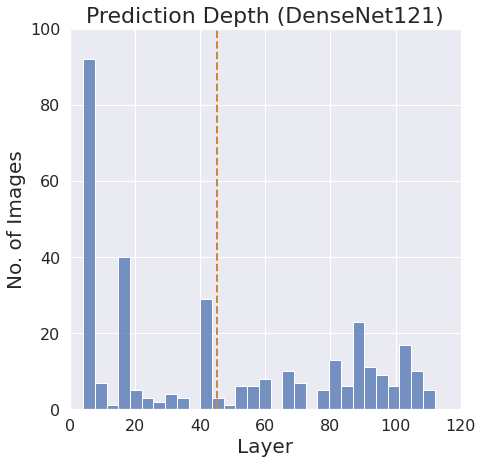

In [117]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (DenseNet121)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,120))
plt.ylim((0,100))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

mask = (batch_info['pd']>=0) & (batch_info['pd']<=120)
pd_mean = np.mean(batch_info['pd'][mask])

sns_hist = sns.histplot(batch_info['pd'][mask],bins=30)
sns_hist.vlines(pd_mean,0,250,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/github_covid_ep1.svg")

### KMNIST w/ patch

In [3]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_kmnist_patch_48316_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

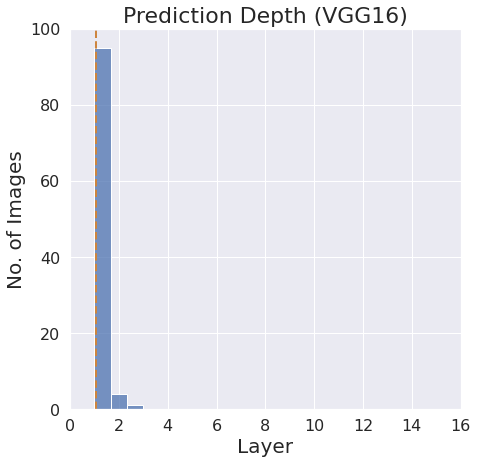

In [4]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,100))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=3)
sns_hist.vlines(pd_mean,0,100,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/kmnist_patch.svg")

### Ep-1 KMNIST w/ Patch

In [118]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_kmnist_patch_84442_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

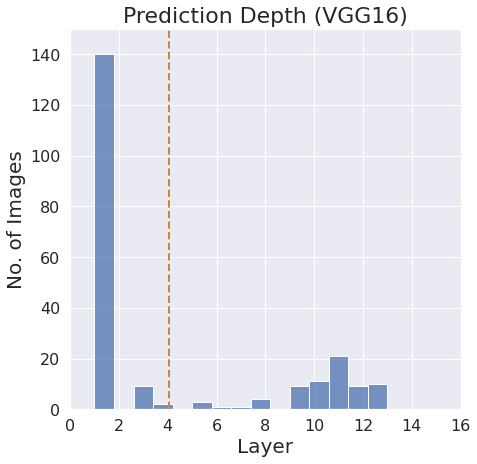

In [136]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,150))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

mask = (batch_info['pd']>=0)&(batch_info['pd']<=16)&(correct_preds_arr)
pd_mean = np.mean(batch_info['pd'][mask])

sns_hist = sns.histplot(batch_info['pd'][mask],bins=15)
sns_hist.vlines(pd_mean,0,150,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/kmnist_patch_ep1.svg")

### KMNIST w/o patch

In [5]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_kmnist_27437_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

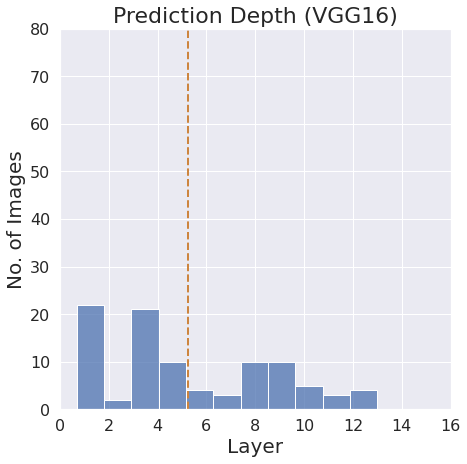

In [6]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,80))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=100)
sns_hist.vlines(pd_mean,0,100,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/kmnist.svg")

### MNIST

In [7]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_mnist_75872_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

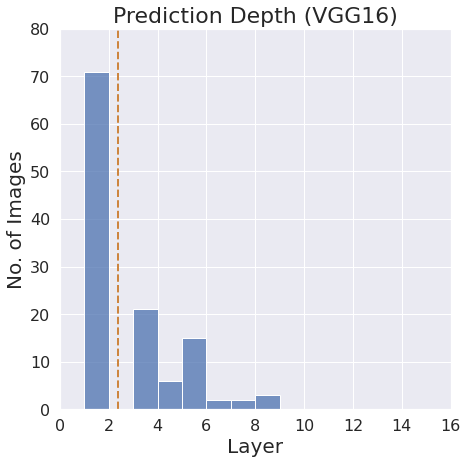

In [8]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,80))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=8)
sns_hist.vlines(pd_mean,0,100,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/mnist.svg")

In [9]:
# sns.set(style="darkgrid")

# plt.figure(figsize=(7,7))
# f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.2})

# plt.ylabel('No. of Images', fontsize=20)
# plt.xlabel('Prediction Depth (VGG16)', fontsize=20)
# plt.xlim((0,16))
# plt.ylim((0,96))
# plt.xticks(fontsize = 13)
# plt.yticks(fontsize = 13)

# sns_hist = sns.histplot(batch_info['pd'],bins=8,ax=ax_top)
# sns_hist = sns.histplot(batch_info['pd'],bins=8,ax=ax_bottom)
# ax_top.set_ylim(60,80)   # those limits are fake
# ax_bottom.set_ylim(0,40)
# plt.subplot(2,1,1)
# plt.title('MNIST', fontsize=20)
# sns_hist.figure.savefig("save_as_a_pdf.pdf")

### FMNIST

In [10]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_fmnist_88507_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

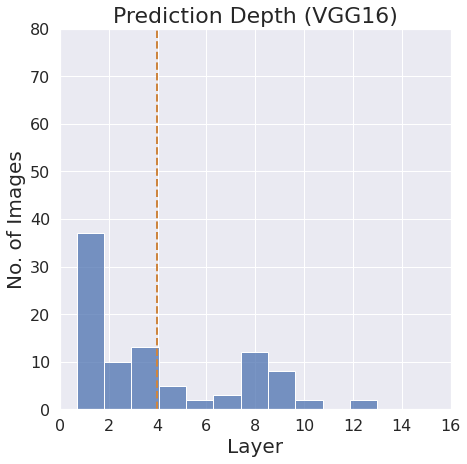

In [11]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,80))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=100)
sns_hist.vlines(pd_mean,0,100,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/fmnist.svg")

### CIFAR10

In [12]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/toy_expts/output/vgg16_cifar10_18394_testPDinfo.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (VGG16)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,16))
plt.ylim((0,80))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=8)
sns_hist.vlines(pd_mean,0,100,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/cifar10.svg")

### NIH

In [24]:
pkl_path = '/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/experiments/medical_expts/nih/128/nih_test_pd.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

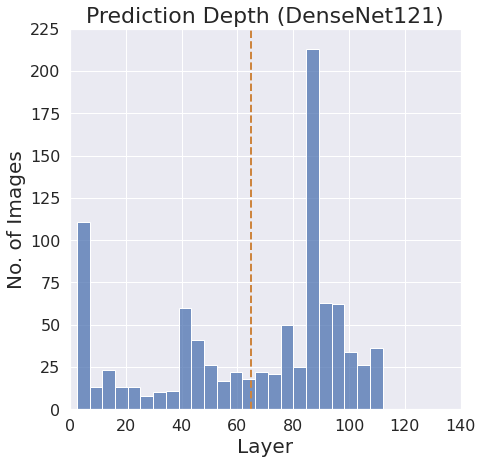

In [30]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title('Prediction Depth (DenseNet121)', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,140))
plt.ylim((0,225))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

pd_mean = np.mean(batch_info['pd'][batch_info['pd']>=0])

sns_hist = sns.histplot(batch_info['pd'],bins=30)
sns_hist.vlines(pd_mean,0,225,color='peru',linestyle='dashed',linewidth=2)
sns_hist.figure.savefig("./results/nih.svg")

### NIH Evolution

In [69]:
ep = 22 # [1,4,7,10,13,16,19,22]
pkl_path = f'/xxx/home/xxx/xxx/xxx/projects/shortcut_detection_and_mitigation/data/nih/pd_analysis/imgsize_128/nih_shortcut_iterations/train_2k_ep{ep}.pkl'
with open(pkl_path, 'rb') as handle:
    batch_info = pickle.load(handle)
batch_info['pd'] = np.array(batch_info['pd'])
batch_info['labels'] = np.array(batch_info['labels'])
batch_info['preds'] = np.array(batch_info['preds'])
pos_pd_arr = (batch_info['pd']>=0)
batch_info['pd'][~pos_pd_arr] = 140
pd_mean = np.mean(batch_info['pd'][pos_pd_arr&(batch_info['pd']<=120)])
correct_preds_arr = (batch_info['preds']==batch_info['labels'])

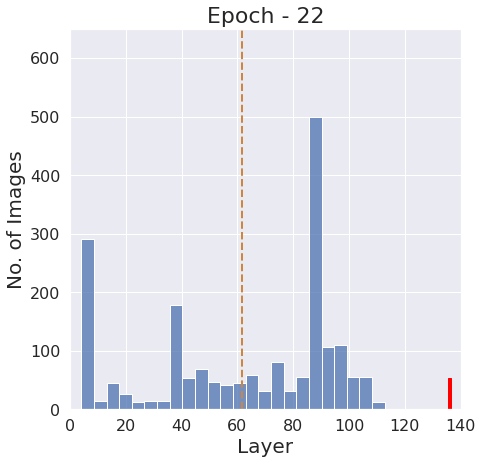

In [70]:
sns.set(style="darkgrid")

plt.figure(figsize=(7,7))
plt.title(f'Epoch - {ep}', fontsize=22)
plt.ylabel('No. of Images', fontsize=20)
plt.xlabel('Layer', fontsize=20)
plt.xlim((0,140))
plt.ylim((0,650))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

sns_hist = sns.histplot(batch_info['pd'],bins=30)
sns_hist.vlines(pd_mean,0,650,color='peru',linestyle='dashed',linewidth=2)
sns_hist.get_children()[29].set_color("red")
sns_hist.get_children()[29].set_width(1)
sns_hist.figure.savefig(f"./results/nih_ep{ep}.svg")

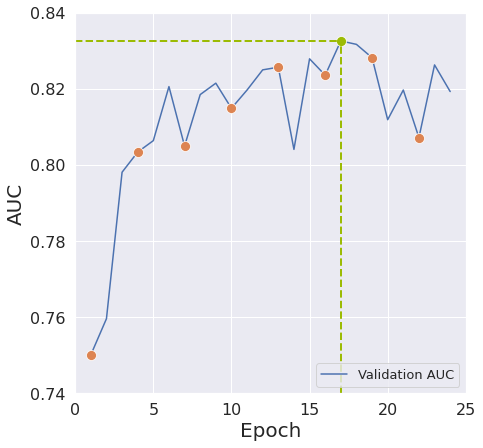

In [103]:
sns.set(style="darkgrid")
plt.figure(figsize=(7,7))
# plt.title('NIH Training', fontsize=22)
plt.ylabel('AUC', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


y = [0.7501,0.7596,0.7981,0.8034,0.8064,0.8206,0.8050,0.8185,0.8215,0.8149,0.8197,0.8250,0.8257,0.8041,0.8279,0.8236,0.8326,0.8317,0.8282,0.8119,0.8197,0.8072,0.8263,0.8193]
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
sns.lineplot(x=x,y=y,label='Validation AUC')
y = [0.7501,0.8034,0.8050,0.8149,0.8257,0.8236,0.8282,0.8072]
x = [1,4,7,10,13,16,19,22]
sns_plot = sns.lineplot(x=x,y=y,marker= 'o',markersize=10,linestyle='',palette=["yellow"])
y = [0.8326]
x = [17]
sns_plot = sns.lineplot(x=x,y=y,marker= 'o',markersize=10,linestyle='',color=sns.xkcd_rgb['bright olive'])

plt.xlim((0,25))
plt.ylim((0.74,0.84))
sns_plot.vlines(17,0.74,0.8326,color=sns.xkcd_rgb['bright olive'],linestyle='dashed',linewidth=2)
sns_plot.hlines(0.8326,0,17,color=sns.xkcd_rgb['bright olive'],linestyle='dashed',linewidth=2)

plt.legend(fontsize=13,loc='lower right')
sns_plot.figure.savefig("./results/nih_training.svg",bbox_inches='tight')